In [1]:
import pandas as pd
# read and set pandas data
data = pd.read_csv('nyc-rolling-sales.csv')
pd.set_option('display.max_columns', None)

In [2]:
# Remove "0" and "-" values on SALE PRICE
data_price = data[data['SALE PRICE'] != ' -  ']
data_price = data_price[data_price['SALE PRICE'] != '0']

In [3]:
# check what range the sales process is in
dates = data_price['SALE DATE'].to_list()
unique_dates = []
for i in dates:
    unique_dates.append(i[:7])
unique_dates = sorted(list(set(unique_dates)))
print(f"Sale data between {unique_dates[0]} and {unique_dates[-1]}")
print(f"There are {len(unique_dates)} months")

Sale data between 2016-09 and 2017-08
There are 12 months


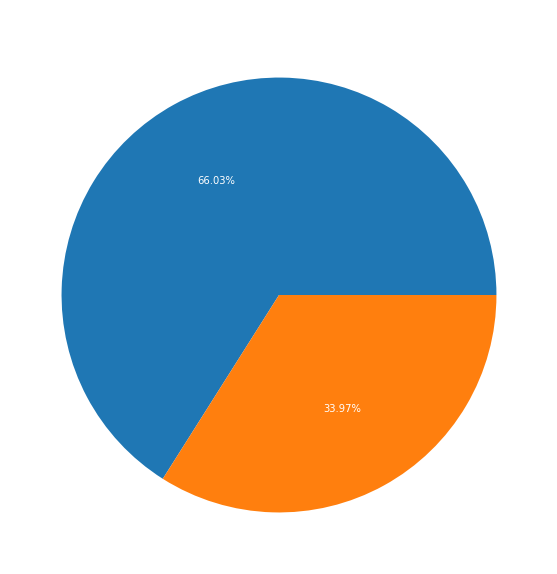

2017 revenue is 58,988,138,808.00
2017 monthly average is 7,373,517,351.00

2016 revenue is 30,347,222,100.00
2016 monthly average is 7,586,805,525.00

Total(2016-09 and 2017-08) revenue is 89,335,360,909.00


In [5]:
# check month with the highest sales
# split date into year, month and day
temp = []
for i, date in enumerate(dates):
    #year, month, day = date[:4], date[5:7], date[8:10]
    temp_dict = {
        'year': int,
        'month': int,
        'day': int
    }
    temp_dict['year'] = int(date[:4])
    temp_dict['month'] = int(date[5:7])
    temp_dict['day'] = int(date[8:10])
    temp.append(temp_dict)

# Check highest sales
temp_df = pd.DataFrame(temp, columns=['year', 'month', 'day'])
del temp, temp_dict

# visualize sales by year
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (15, 10))
plt.title('Sales by year', color='white')
_, years, percetange = plt.pie(x=temp_df['year'].value_counts(), labels=temp_df['year'].value_counts().index, autopct='%1.2f%%', textprops={'color':"w"})
plt.show()
total_revenue = [float(price) for price in data_price['SALE PRICE']]
total_revenue = sum(total_revenue)
for i in range(len(percetange)):
    perc = float((str(percetange[i]).split(',')[-1])[2:7])
    year = int(str(years[i]).split(',')[-1][2:6])
    print("{} revenue is {:12,.2f}".format(year, int(total_revenue*(perc/100))))
    if year == 2016:
        print('2016 monthly average is {:12,.2f}\n'.format(int(total_revenue*(perc/100)) / 4))
    else:
        print('2017 monthly average is {:12,.2f}\n'.format(int(total_revenue*(perc/100)) / 8))
print('Total(2016-09 and 2017-08) revenue is {:12,.2f}'.format(total_revenue))

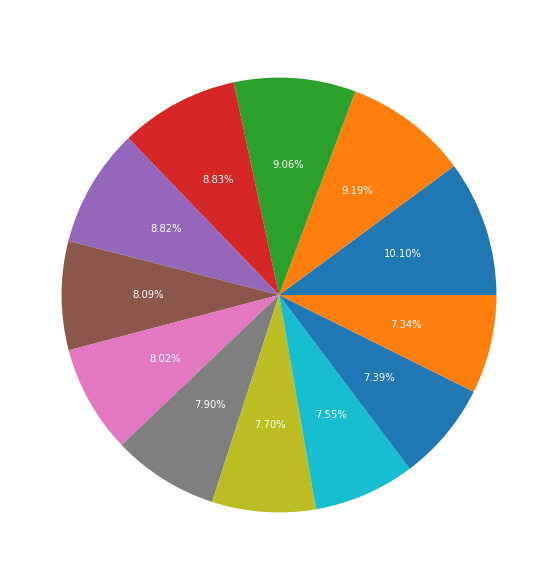

In [6]:
# visualize sales by month
fig = plt.figure(figsize = (15, 10))
plt.title('Sales by month', color='white')
labels = {1:'Jan', 2:'Feb', 3:'March', 4:'April', 5:'May', 6:'June', 7:'July', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'}
X = temp_df['month'].value_counts()
# order labels
ordered_labels = [labels[temp_df['month'].value_counts().index[i]] for i in range(len(labels))]
plt.pie(x=X, labels=ordered_labels, autopct='%1.2f%%', textprops={'color':"w"})
plt.show()

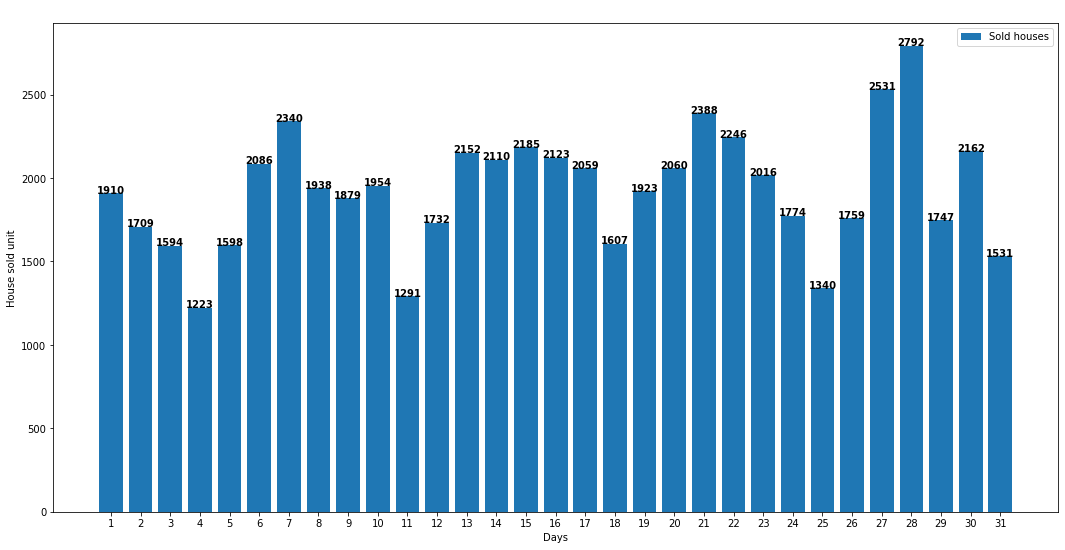

In [8]:
import numpy as np
# visualize sales by day
fig = plt.figure(figsize = (18, 9))
plt.title('Sales by year', color='white')
#plt.pie(x=temp_df['day'].value_counts(), labels=temp_df['day'].value_counts().index, autopct='%1.2f%%', textprops={'color':"w"})
x_vals = temp_df['day'].value_counts().index
y_vals = temp_df['day'].value_counts().values
plt.xlabel('Days')
plt.xticks(x_vals)
plt.ylabel('House sold unit')
plt.bar(x_vals, y_vals, label='Sold houses')
#for i in range(len(y_vals)):
#    plt.text(i, x_pos[i], temp_df['day'].value_counts().index[i], ha='center', va='top')
for i, v in enumerate(y_vals):
    plt.text(x_vals[i], v, str(v), horizontalalignment='center', weight=1000)
plt.legend()
plt.show()


In [9]:
zip_codes = data_price['ZIP CODE'].value_counts()
zip_codes = pd.DataFrame({'zip_code':zip_codes.index, 'unit':zip_codes.values})
zip_codes

,zip_code,unit
0,10314,1144
1,11354,1110
2,11201,1054
3,11375,921
4,10011,876
...,...,...
179,10475,27
180,10282,8
181,10105,4
182,10167,1


The most sold 10 zip codes are equal 15 percent of all zip codes



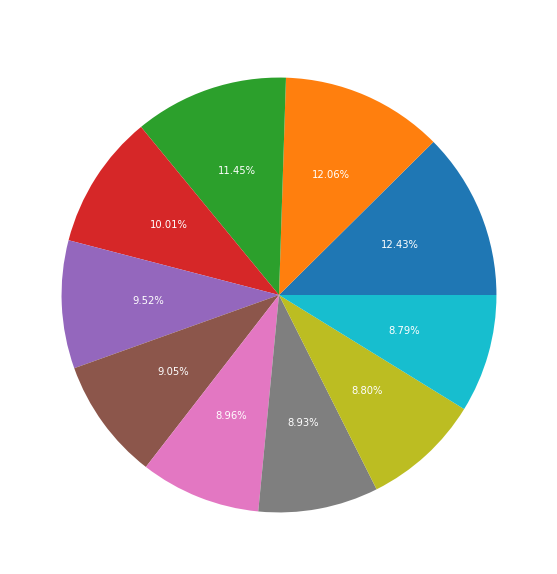

In [10]:
# Visualize top 10 area

print(f"The most sold 10 zip codes are equal {int(zip_codes['unit'][:10].sum()/zip_codes['unit'].sum()*100)} percent of all zip codes\n")
fig = plt.figure(figsize = (15, 10))
plt.pie(x=zip_codes['unit'][:10], labels=zip_codes['zip_code'][:10], autopct='%1.2f%%', textprops={'color':"w"})
plt.title('Most sold 10 zip code percentage', color='white')
plt.show()

In [11]:
# There are 2631 houses under 100.000 price
print('There are {} houses under 100,000'.format(data_price[data_price['SALE PRICE'].apply(int) < 100000].sort_values(by='SALE PRICE').shape[0]))

There are 2631 houses under 100,000


In [12]:
# Check the threshold prices for see which places are more expensive
# As shown below you have 2 option, one is high price less house
# other one is low prices and lot of houses
top_houses = []
for zip_code in zip_codes['zip_code'][:5]:
    df = data_price[data_price['ZIP CODE'] == zip_code]
    top_10 = df.value_counts('ADDRESS')[:10]
    for i, address in enumerate(top_10.index):
        avg = data_price[(data_price['ZIP CODE'] == zip_code) & (data_price['ADDRESS'] == address)]['SALE PRICE'].apply(int).mean()
        if int(avg) > 1000000:
            temp = {
                'average': int(avg),
                'zip_code': int(zip_code),
                'total_house': int(top_10.values[i]),
                'address': str(address),
                'house_number': int(top_10.values[i])
            }
            txt = str(zip_code) + ',' + address
            top_houses.append(temp)

In [13]:
# Check the most expensive houses
# If you wanna sell expensive villa "265 STATE STREET" is not good place to sell
# but "BLOOMFIELD AVENUE" is nice place to sell
top_houses = sorted(top_houses, key = lambda i: i['average'],reverse=True)
for i in top_houses:
    print("{}, {:12,.2f} out of {}\t addressed in {}".format(i['zip_code'], i['average'], i['house_number'], i['address']))

10314, 36,250,000.00 out of 3	 addressed in BLOOMFIELD AVENUE
10011, 12,866,991.00 out of 24	 addressed in 551 WEST 21ST   STREET
10011, 11,023,794.00 out of 21	 addressed in 155 WEST 11
10011, 8,765,236.00 out of 10	 addressed in 155 WEST 11TH STREET
10011, 7,780,689.00 out of 9	 addressed in 155 WEST 11TH
10011, 4,973,450.00 out of 5	 addressed in 35 WEST 15TH   STREET
11201, 3,844,308.00 out of 72	 addressed in 90 FURMAN STREET
10011, 2,993,571.00 out of 7	 addressed in 133 WEST 22ND   STREET
10011, 2,851,666.00 out of 6	 addressed in 650 SIXTH AVENUE
10011, 2,614,828.00 out of 25	 addressed in 55 WEST 17TH   STREET
11201, 2,290,478.00 out of 55	 addressed in 51 JAY STREET
11354, 2,152,108.00 out of 14	 addressed in 38-08 UNION STREET
11201, 2,006,103.00 out of 126	 addressed in 265 STATE STREET
11354, 1,657,810.00 out of 50	 addressed in 138-35 39TH   AVENUE
11201, 1,619,388.00 out of 18	 addressed in 70 WASHINGTON STREET
11201, 1,535,886.00 out of 22	 addressed in 360 FURMAN STREE